<a href="https://colab.research.google.com/github/KJR020/The-Data-Science-Course-2020-Complete-Data-Science-Bootcamp/blob/main/Section33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot  as plt
import seaborn as sns
import sklearn as sk
sns.set()

In [14]:
raw_data = pd.read_csv("/content/drive/MyDrive/DataAnalysis_projects/Complete Data Science Training/1.03. Dummies.csv")

In [15]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [16]:
data = raw_data.copy()

In [17]:
data["Attendance"] = data["Attendance"].map({"Yes":1,"No":0})

In [19]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


##Regression

In [20]:
y = data["GPA"]
x1 = data[["SAT","Attendance"]]

In [21]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           2.19e-15
Time:                        01:24:42   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

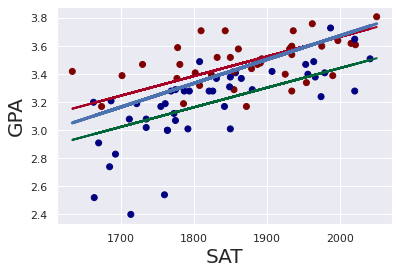

In [30]:
plt.scatter(data["SAT"],y,c=data["Attendance"],cmap='jet')
yhat_no = 0.6439 + 0.0014*data["SAT"]
yhat_yes = 0.8665 + 0.0014*data["SAT"]
yhat = 0.0017*data["SAT"] + 0.275
fig = plt.plot(data["SAT"],yhat_no, lw=2, c="#006637",label="refression line1")
fig = plt.plot(data["SAT"],yhat_yes, lw=2, c="#a50026",label="refression line2")
fig = plt.plot(data["SAT"],yhat, lw=3, c="#4C72b0",label="refression line")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show()